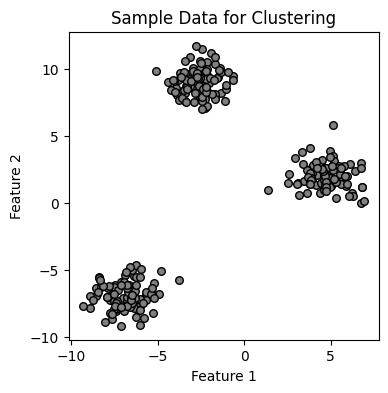

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

plt.figure(figsize=(4,4))
plt.scatter(X[:,0], X[:,1], c='gray', s=30, edgecolor='k')
plt.title("Sample Data for Clustering")
plt.xlabel("Feature 1"); plt.ylabel("Feature 2")
plt.show()


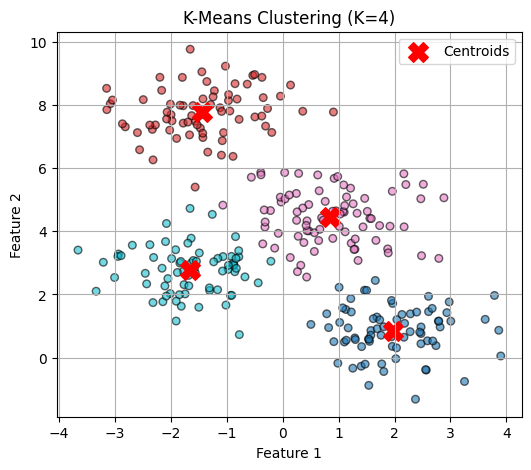

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 1. サンプルデータ生成
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=0)

# 2. K-Means モデル訓練
k = 4
km = KMeans(n_clusters=k, init='k-means++', random_state=42)
labels = km.fit_predict(X)
centers = km.cluster_centers_

# 3. 結果可視化
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='tab10', s=30, edgecolor='k', alpha=0.6)
plt.scatter(centers[:,0], centers[:,1],
            c='red', marker='X', s=200, label='Centroids')
plt.title(f'K-Means Clustering (K={k})')
plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X, labels)
print(f'Silhouette Score: {score:.3f}')

Silhouette Score: 0.580


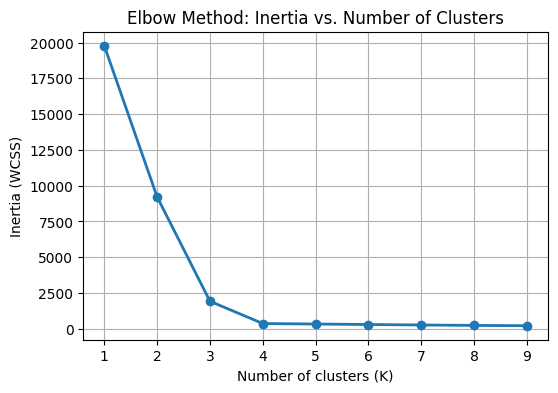

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 1. 生成示例数据
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=42)

# 2. 训练不同簇数的 KMeans，并收集 inertia_
inertias = []
K_range = range(1, 10)
for k in K_range:
    km = KMeans(n_clusters=k, init='k-means++', random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)

# 3. 绘制肘部曲线
plt.figure(figsize=(6,4))
plt.plot(K_range, inertias, 'o-', linewidth=2)
plt.title("Elbow Method: Inertia vs. Number of Clusters")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.xticks(K_range)
plt.grid(True)
plt.show()

0.21100834401473906


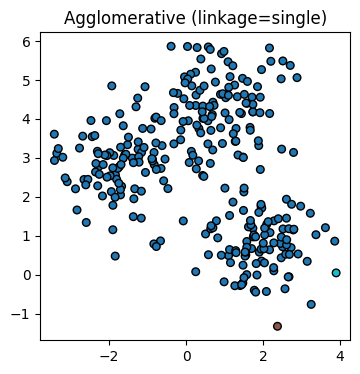

0.5162044079168923


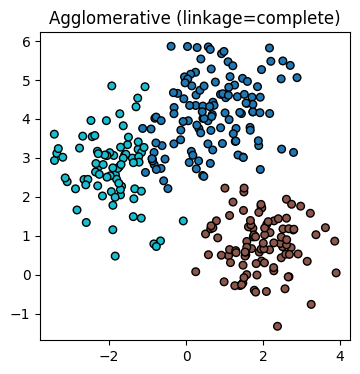

0.5554638977090867


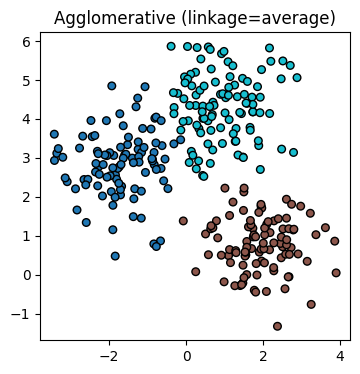

0.5554638977090867


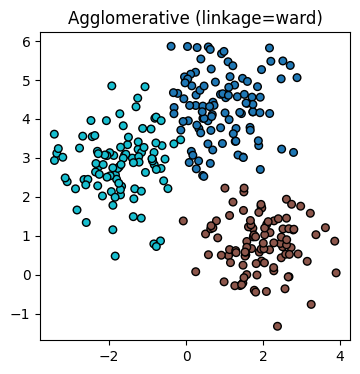

In [12]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# サンプルデータ生成
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.8, random_state=0)

# 既に X (n_samples, 2) のデータがあると仮定
for linkage_method in ['single', 'complete', 'average', 'ward']:
    agg = AgglomerativeClustering(n_clusters=3, linkage=linkage_method)
    labels = agg.fit_predict(X)
    score = silhouette_score(X, labels)
    print(score)
    plt.figure(figsize=(4,4))
    plt.scatter(X[:,0], X[:,1], c=labels, cmap='tab10', s=30, edgecolor='k')
    plt.title(f"Agglomerative (linkage={linkage_method})")
    plt.show()

In [11]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X, labels)
print(score)

0.5554638977090867
